In [31]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)

In [32]:
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 50
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

In [33]:
print(X.shape)
print(y.shape)

(3, 100)
(1, 100)


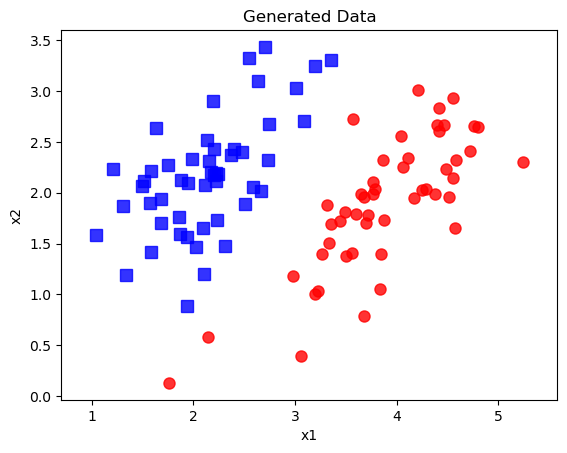

In [34]:
plt.plot(X0[0, :], X0[1, :], 'bs', markersize=8, alpha=0.8)
plt.plot(X1[0, :], X1[1, :], 'ro', markersize=8, alpha=0.8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Generated Data')
plt.axis('equal')
plt.show()

In [56]:
def h(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []
    losses = []
    while True:
        mix_id = np.random.permutation(N)
        loss = 0
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi 
                w.append(w_new)
                loss += 1
        losses.append(loss)
        if has_converged(X, y, w[-1]):
            break
    return w, mis_points, losses

In [57]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m, losses) = perceptron(X, y, w_init)
print(m)
print(w)
print(len(w))

[60, 5, 19, 51, 25, 16, 71, 9, 84, 49, 78, 48, 75, 24, 62, 6, 39, 90, 7, 66, 45, 11, 89, 37, 49, 61, 39, 97, 22, 33, 52, 38, 89, 21, 49, 66, 30, 52, 31, 39, 62, 13, 97, 42, 39, 67, 4, 52, 26, 29, 66, 12, 52, 0, 39, 52, 7, 39, 62, 29, 97, 47, 49, 80, 7, 29, 62, 49, 52, 49, 2, 52, 33, 97, 4]
[array([[ 0.66542829],
       [ 2.84750713],
       [-0.11608639]]), array([[-0.33457171],
       [-1.56651362],
       [-2.72348038]]), array([[ 0.66542829],
       [-0.35479393],
       [-0.48665411]]), array([[1.66542829],
       [1.52392746],
       [1.63461474]]), array([[ 0.66542829],
       [-2.94579673],
       [-1.02879434]]), array([[ 1.66542829],
       [-1.3607648 ],
       [ 0.38580784]]), array([[2.66542829],
       [1.83141257],
       [3.62839804]]), array([[ 1.66542829],
       [-3.40761986],
       [ 1.32075586]]), array([[ 2.66542829],
       [-1.03570249],
       [ 3.69670945]]), array([[ 1.66542829],
       [-2.79774797],
       [ 3.56744755]]), array([[ 2.66542829],
       [-0.8

In [60]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

In [50]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 